**ALGERIAN FOREST FIRE DATASET**

In this dataset we are doing EDA and preprocessing and then predicting the classes.

***Content Attribute Information:***

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire.

***IMPORTING THE REQUIRED PACKAGES:***

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor 
regression = LinearRegression()
scaler = StandardScaler() 
ridge = Ridge()
lasso = Lasso()
EN = ElasticNet()
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/itsguptaaman/Algerian_forest_fires_dataset/main/Algerian_forest_fires_dataset_UPDATE.csv")

In [4]:
header_row = data.iloc[0]
data = pd.DataFrame(data.values[1:,], columns=header_row)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,244,245
unique,33,5,2,20,63,19,40,174,167,199,107,175,126,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [7]:
data = data.drop([data.index[122],data.index[123], data.index[124]])

In [8]:
data.iloc[165,9] = data.iloc[165,9].replace(" ", "")

In [9]:
data["day"] = pd.to_numeric(data['day'])
data["month"] = pd.to_numeric(data['month'])
data["year"] = pd.to_numeric(data['year'])
data["Temperature"] = pd.to_numeric(data['Temperature'])
data["FFMC"] = pd.to_numeric(data['FFMC'])
data["DMC"] = pd.to_numeric(data['DMC'])
data["DC"] = pd.to_numeric(data['DC'])
data["ISI"] = pd.to_numeric(data['ISI'])
data["BUI"] = pd.to_numeric(data['BUI'])
data["FWI"] = pd.to_numeric(data['FWI'])
data[" Ws"] = pd.to_numeric(data[" Ws"])
data[" RH"] = pd.to_numeric(data[' RH'])
data["Rain "] = pd.to_numeric(data['Rain '])

In [10]:
data = data.replace("NaN", 0)
data['Classes  '] = data['Classes  '].str.strip()

In [22]:
#typecasting object into int

In [11]:
data["day"] = data['day'].astype(int)
data["month"] = data['month'].astype(int)
data["year"] = data['year'].astype(int)
data["Temperature"] = data['Temperature'].astype(int)
data["FFMC"] = data['FFMC'].astype(int)
data["DMC"] = data['DMC'].astype(int)
data["DC"] = data['DC'].astype(int)
data["ISI"] = data['ISI'].astype(int)
data["BUI"] = data['BUI'].astype(int)

data[" Ws"] = data[' Ws'].astype(int)
data[" RH"] = data[' RH'].astype(int)
data["Rain "] = data['Rain '].astype(int)

In [23]:
#replacing values with 0

In [12]:
data['Rain '] = data['Rain '].replace(0,data['Rain '].mean())
data['Temperature'] = data['Temperature'].replace(0,data['Temperature'].mean())
data['day'] = data['day'].replace(0,data['day'].mean())
data['FFMC'] = data['FFMC'].replace(0,data['FFMC'].mean())
data['FWI'] = data['FWI'].replace(0,data['FWI'].mean())
data['FWI'] = data['FWI'].fillna(data['FWI'].mean())
data['month'] = data['month'].replace(0,data['month'].mean())
data[' Ws'] = data[' Ws'].replace(0,data[' Ws'].mean())
data['DC'] = data['DC'].replace(0,data['DC'].mean())
data['ISI'] = data['ISI'].replace(0,data['ISI'].mean())
data['BUI'] = data['BUI'].replace(0,data['BUI'].mean())
data['year'] = data['year'].replace(0,data['year'].mean())
data['DMC'] = data['DMC'].replace(0,data['DMC'].mean())
data[' RH'] = data[' RH'].replace(0,data[' RH'].mean())
data['Classes  '] = data['Classes  '].replace("not fire", 0)
data['Classes  '] = data['Classes  '].replace("fire", 1)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4    RH          244 non-null    int32  
 5    Ws          244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    int32  
 8   DMC          244 non-null    float64
 9   DC           244 non-null    int32  
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    int32  
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
dtypes: float64(4), int32(9), int64(1)
memory usage: 20.0 KB


In [14]:
data = data.drop(["day", "month", "year"], axis= 1)

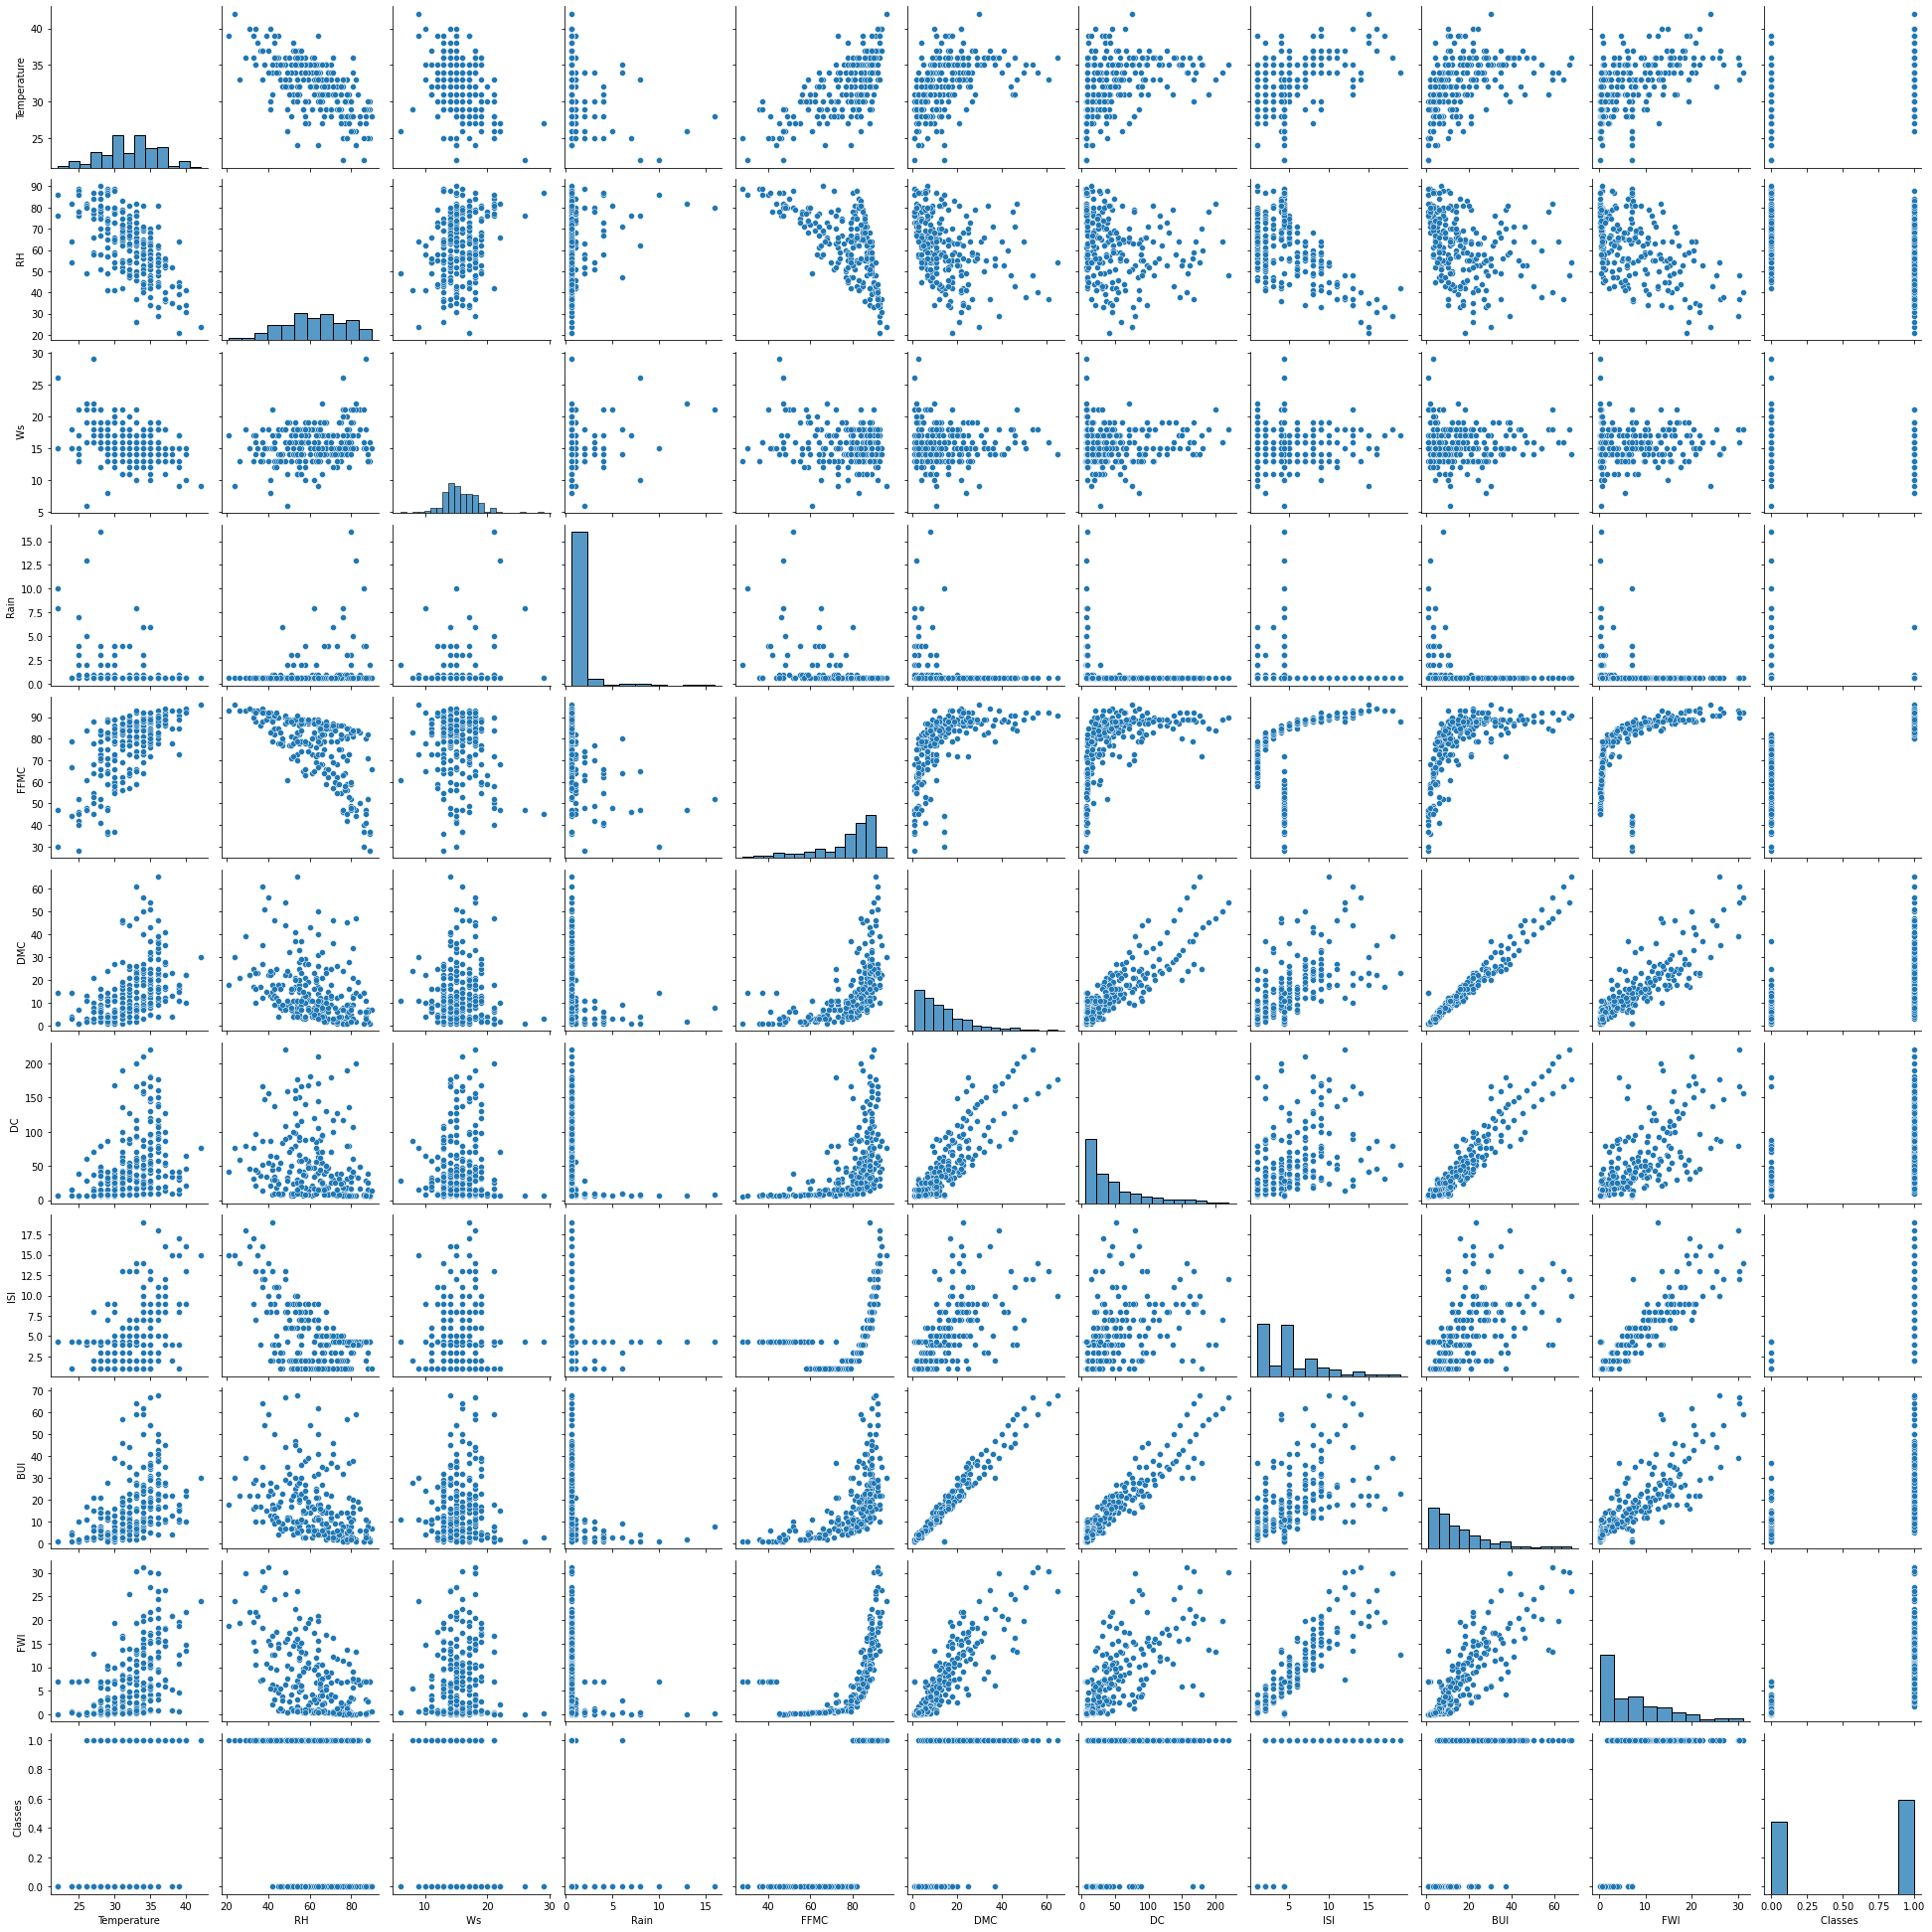

In [15]:
sns.pairplot(data)

<AxesSubplot:xlabel='0', ylabel='0'>

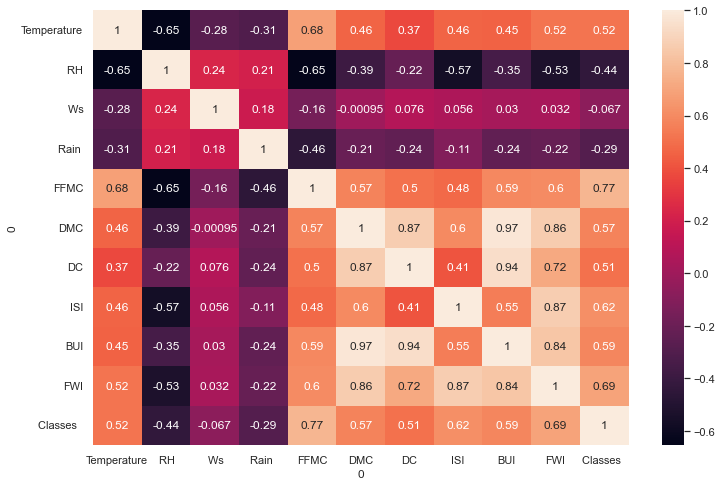

In [16]:
sns.set(rc= {"figure.figsize":(12,8)})
sns.heatmap(data.corr(),annot= True)

Text(0, 0.5, 'TEMPERATURE')

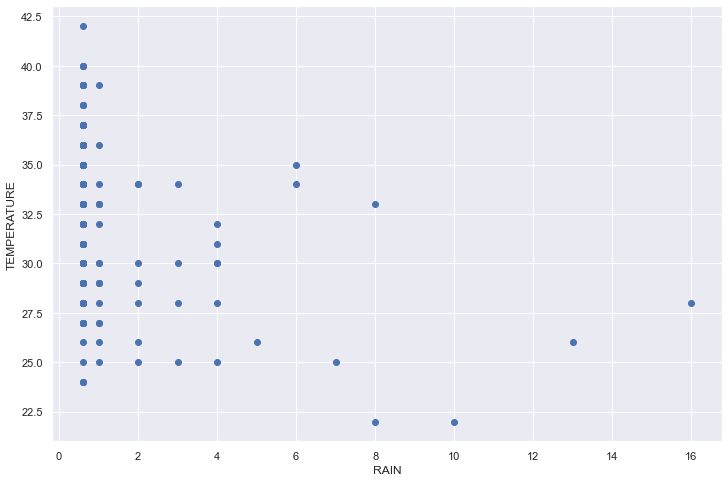

In [18]:
plt.scatter(data[' RH'],data['Temperature'])
plt.xlabel("RH")
plt.ylabel("TEMPERATURE")

<AxesSubplot:xlabel=' RH', ylabel='Temperature'>

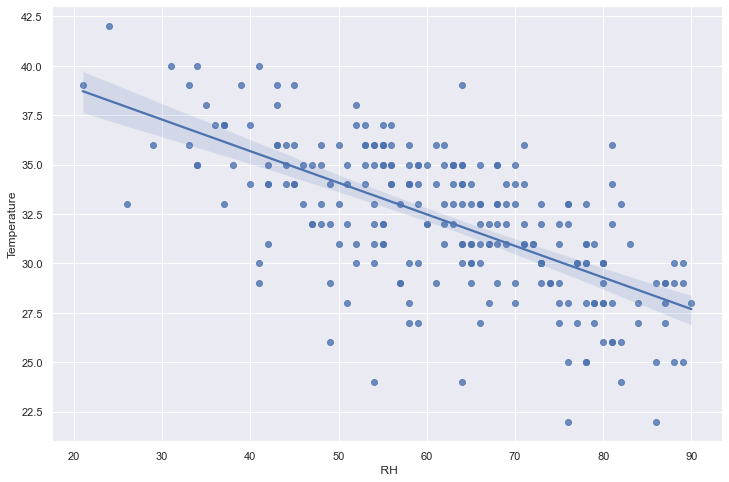

In [20]:
sns.regplot(x=" RH",y="Temperature",data=data)

C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

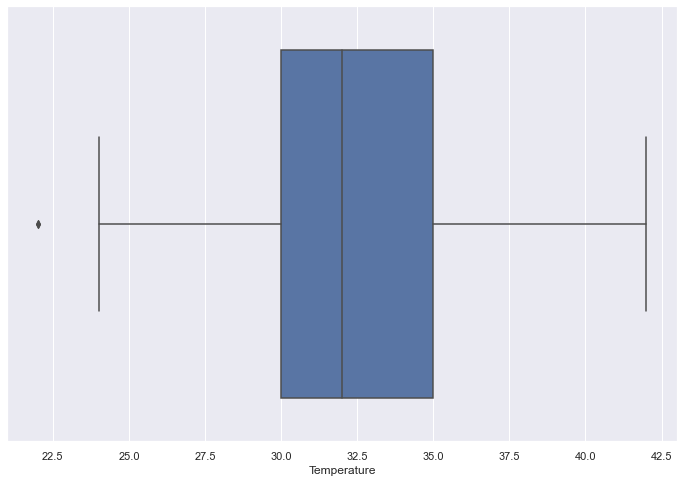

In [21]:
sns.boxplot(data['Temperature'])

**Dropping highly correlated data:**

In [17]:
data = data.drop(["DMC", "DC"," RH"], axis= 1)

<AxesSubplot:xlabel='0'>

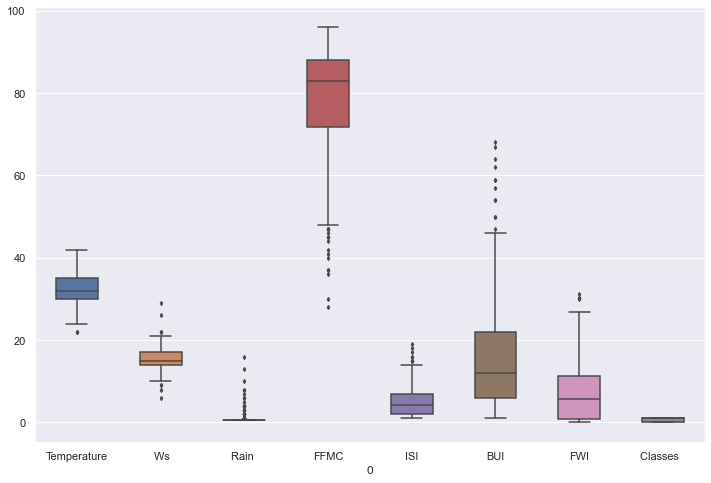

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

C:\Users\MGC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MGC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MGC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

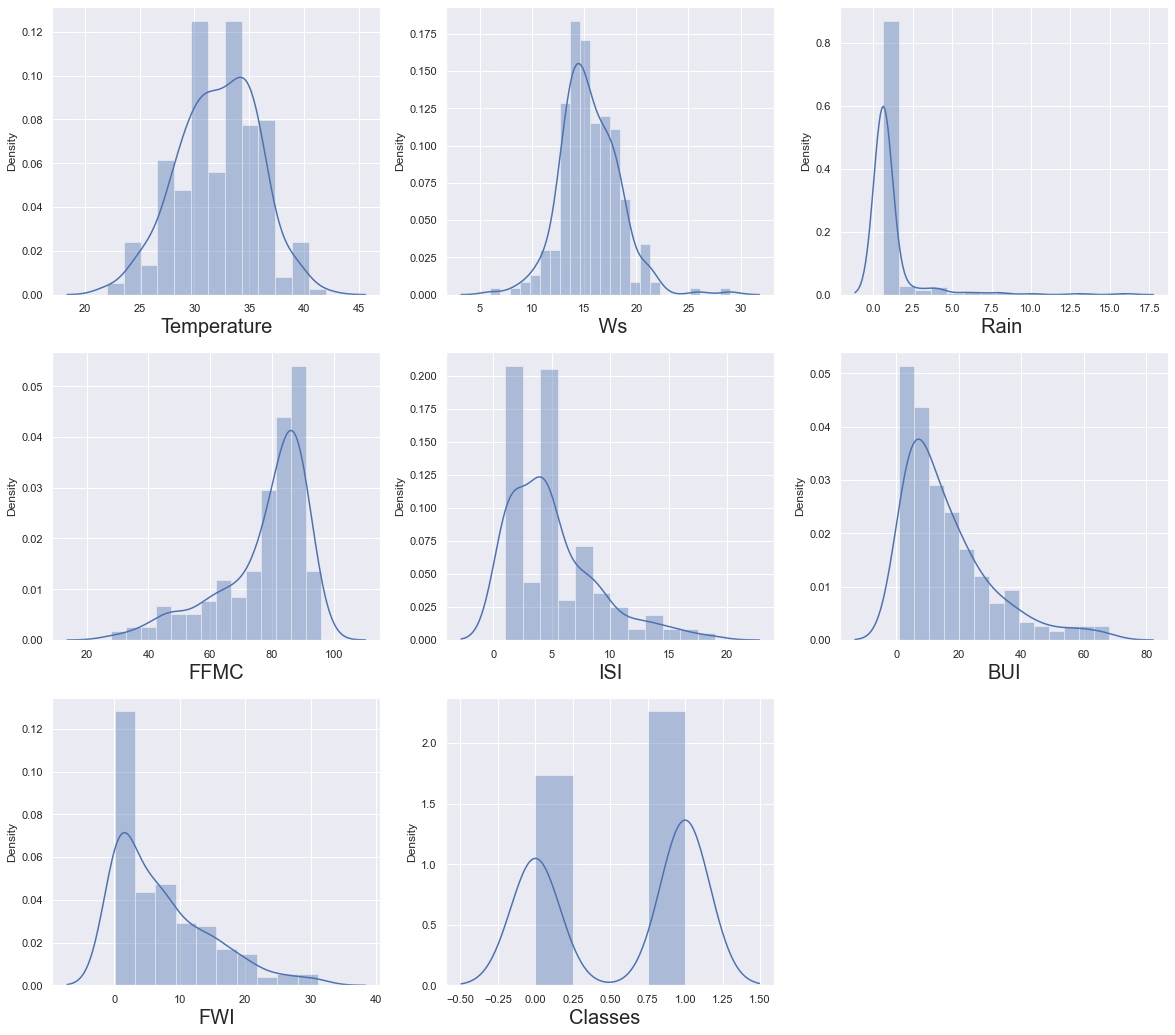

In [20]:
plt.figure(figsize=(20,18), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [21]:
x = data.drop("Temperature", axis= 1)
y = data["Temperature"]

In [22]:
x

,Ws,Rain,FFMC,ISI,BUI,FWI,Classes
0,18,0.598361,65,1.000000,3,0.500000,0
1,13,1.000000,64,1.000000,3,0.400000,0
2,22,13.000000,47,4.360656,2,0.100000,0
3,13,2.000000,28,4.360656,1,7.035391,0
4,16,0.598361,64,1.000000,3,0.500000,0
...,...,...,...,...,...,...,...
242,14,0.598361,85,4.000000,16,6.500000,1
243,15,4.000000,41,4.360656,6,7.035391,0
244,29,0.598361,45,4.360656,3,0.200000,0
245,18,0.598361,79,1.000000,5,0.700000,0


In [23]:
y

0      29
1      29
2      26
3      25
4      27
       ..
242    30
243    28
244    27
245    24
246    24
Name: Temperature, Length: 244, dtype: int32

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=10)

In [25]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

**LINEAR REGRESSION**

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used.

In [26]:
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
print(regression.coef_)

[-7.34524090e-01 -2.61823845e-01  1.99829007e+00  6.54877927e-01
 -9.72159296e-04  2.69910191e-01 -3.99974874e-01]


In [28]:
print(regression.intercept_)

32.17791411042945


In [29]:
reg_pred = regression.predict(X_test)

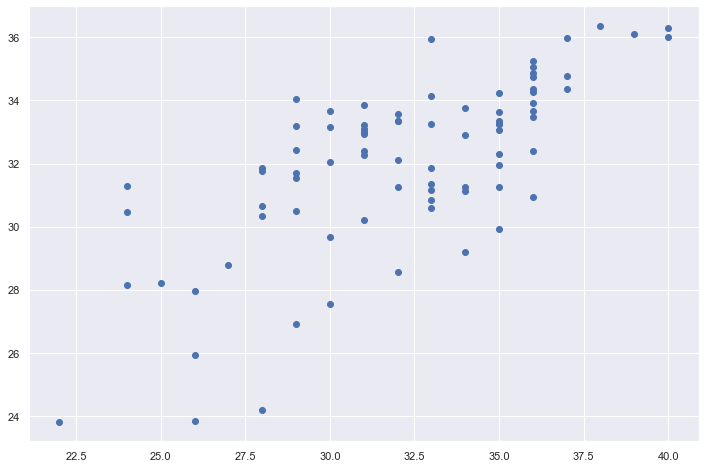

In [30]:
plt.scatter(y_test, reg_pred)

In [31]:
residuals = y_test- reg_pred

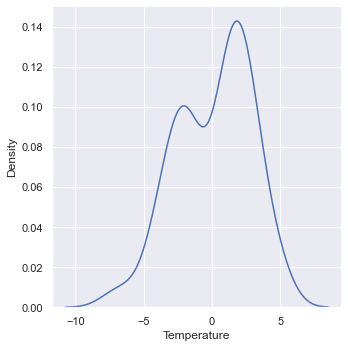

In [32]:
sns.displot(residuals, kind="kde")

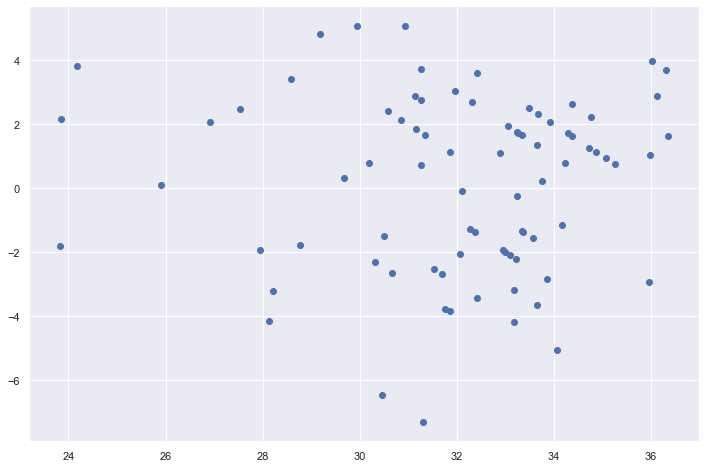

In [33]:
plt.scatter(reg_pred, residuals)

In [34]:
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

7.500071516837872
2.3673236570716845
2.7386258446231517


In [35]:
score = r2_score(y_test, reg_pred)
print(score)

0.5040419155599458


In [84]:
##ADJUSTED R SQUARE

In [36]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4564842910245982

**RIDGE REGRESSION**

Ridge regressionis a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [37]:
ridge.fit(X_train,y_train)

Ridge()

In [38]:
ridge.predict(X_test)

array([31.10306896, 33.28002197, 32.37574122, 31.93646248, 33.05306084,
       34.73564415, 33.66347445, 31.3038357 , 32.44547444, 33.56897721,
       33.91635103, 27.55660622, 33.64481625, 29.16266674, 29.931288  ,
       32.89750637, 33.36091158, 28.25170924, 36.31582174, 34.3744369 ,
       32.95728007, 33.65412365, 33.75176267, 33.47413721, 36.06497906,
       30.32783993, 30.96637637, 32.07429479, 27.98516254, 33.02382849,
       25.92744835, 26.98745428, 34.15215983, 31.21073506, 33.23050839,
       30.63576563, 29.68584378, 32.29410037, 28.18941333, 35.06531871,
       33.25332936, 34.36766365, 33.8181783 , 31.86786936, 36.28156552,
       34.22178458, 24.11929237, 34.84646452, 34.27132867, 31.52364812,
       32.0897493 , 33.10478777, 35.25411229, 32.4027814 , 31.7813678 ,
       30.19292887, 32.3432541 , 35.95179786, 30.58719002, 33.17126833,
       31.89339918, 33.36907056, 30.49926925, 23.81498425, 31.24205614,
       35.96689711, 31.66268143, 28.78480688, 34.77701311, 33.36

In [39]:
print(ridge.coef_)

[-0.7346284  -0.2698505   1.95721309  0.64243314  0.00911576  0.27009959
 -0.36747135]


In [40]:
print(ridge.intercept_)

32.17791411042945


In [41]:
ridge_pred = ridge.predict(X_test)

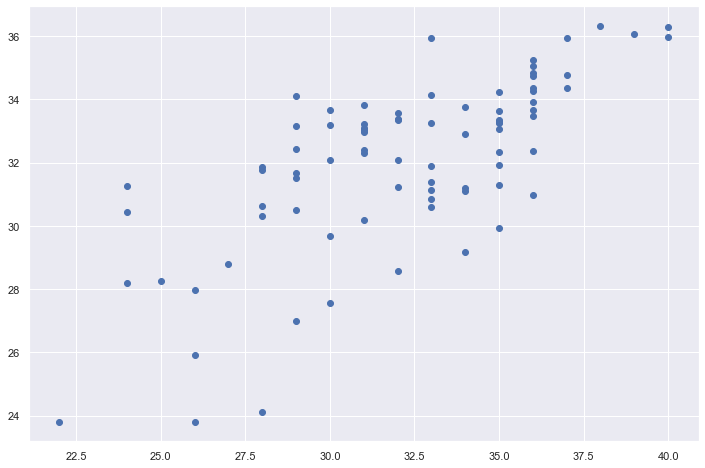

In [42]:
plt.scatter(y_test, ridge_pred)

In [43]:
residual = y_test- ridge_pred

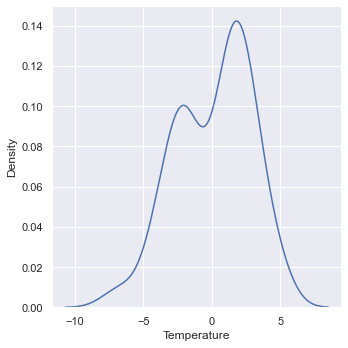

In [44]:
sns.displot(residual, kind="kde")

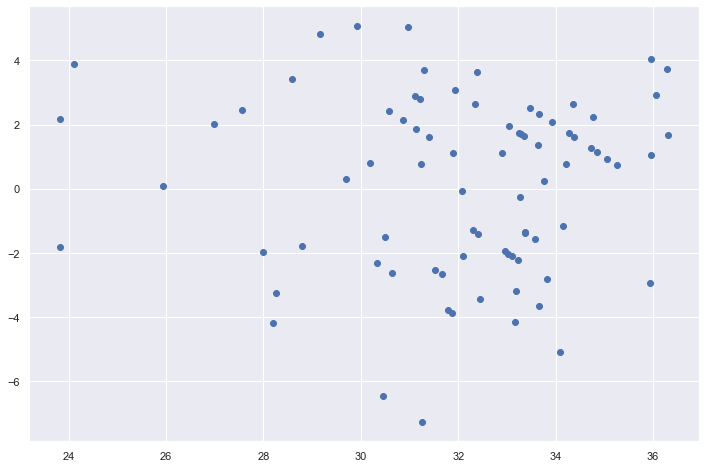

In [45]:
plt.scatter(ridge_pred, residual)

In [46]:
print(mean_squared_error(y_test, ridge_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(np.sqrt(mean_squared_error(y_test, ridge_pred)))

7.529359039858994
2.372173757366473
2.743967754886889


In [47]:
score = r2_score(y_test, ridge_pred)
print(score)

0.5021052161854214


**LASSO REGRESSION**

Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation. 

The less important features of a dataset are penalized by the lasso regression. The coefficients of this dataset are made zero leading to their elimination. The dataset with high dimensions and correlation is well suited for lasso regressio

In [48]:
lasso.fit(X_train, y_train)

Lasso()

In [49]:
print(lasso.coef_)

[-0.        -0.         1.3660043  0.         0.         0.
  0.       ]


In [50]:
print(lasso.intercept_)

32.17791411042945


In [51]:
predict = lasso.predict(X_test)

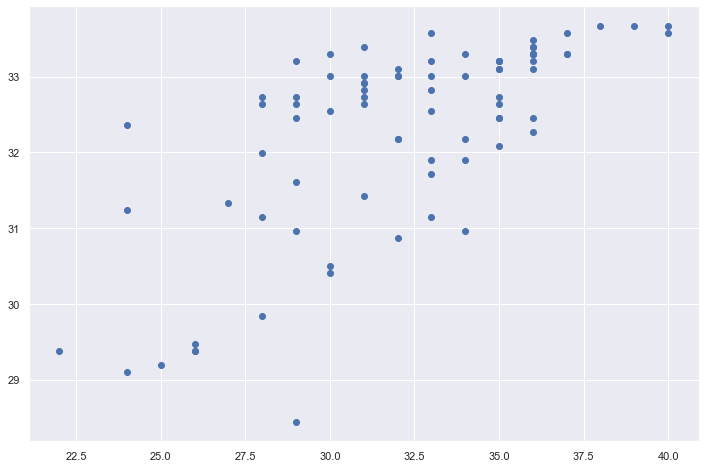

In [52]:
plt.scatter(y_test, predict)

In [53]:
resd = y_test-predict

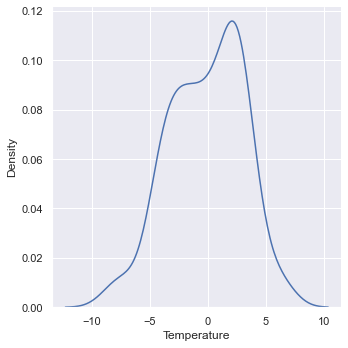

In [54]:
sns.displot(resd, kind="kde")

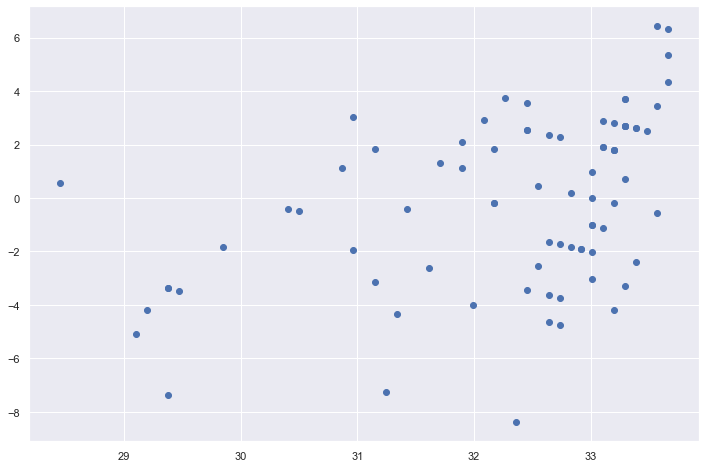

In [55]:
plt.scatter(predict, resd)

In [56]:
print(mean_squared_error(y_test, predict))
print(mean_absolute_error(y_test, predict))
print(np.sqrt(mean_squared_error(y_test, predict)))

9.96505098272091
2.648801272070347
3.156746898742582


In [57]:
score = r2_score(y_test, predict)
print(score)

0.3410399373336299


**ELASTIC-NET REGRESSION**

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [58]:
EN.fit(X_train, y_train)

ElasticNet()

In [59]:
print(EN.coef_)

[-0.19599156 -0.09163956  0.94812779  0.17883173  0.0886992   0.21404642
  0.15448389]


In [60]:
print(EN.intercept_)

32.17791411042945


In [61]:
en_pred = EN.predict(X_test)

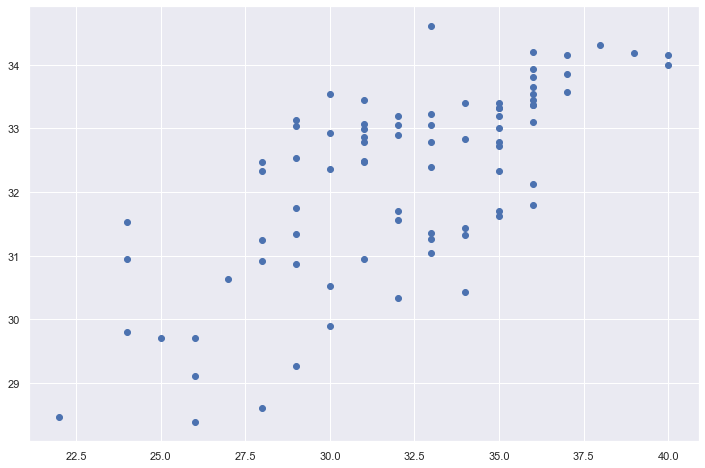

In [62]:
plt.scatter(y_test, en_pred)

In [63]:
res = y_test-en_pred

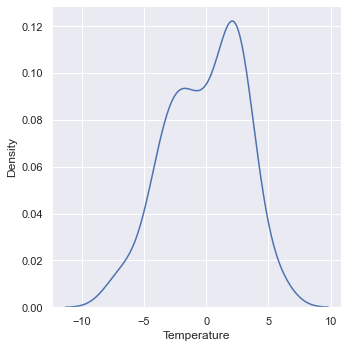

In [64]:
sns.displot(res, kind= "kde")

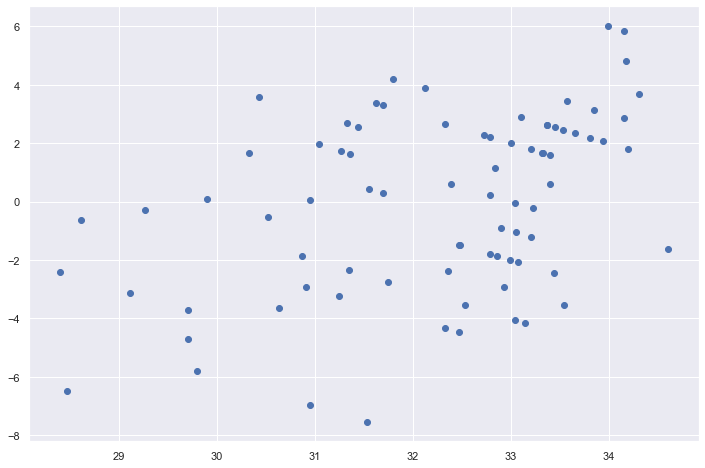

In [65]:
plt.scatter(en_pred,res)

In [66]:
print(mean_squared_error(y_test, en_pred))
print(mean_absolute_error(y_test, en_pred))
print(np.sqrt(mean_squared_error(y_test, en_pred)))

9.163990789970683
2.5639008743354808
3.0272084153507968


In [67]:
score = r2_score(y_test, en_pred)
print(score)

0.39401173604590245


**LOGISTIC REGRESSION**

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. 

In [68]:
X = data.drop(columns = ['Classes  '])
y = data['Classes  ']

C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGC\anaconda3\lib\s

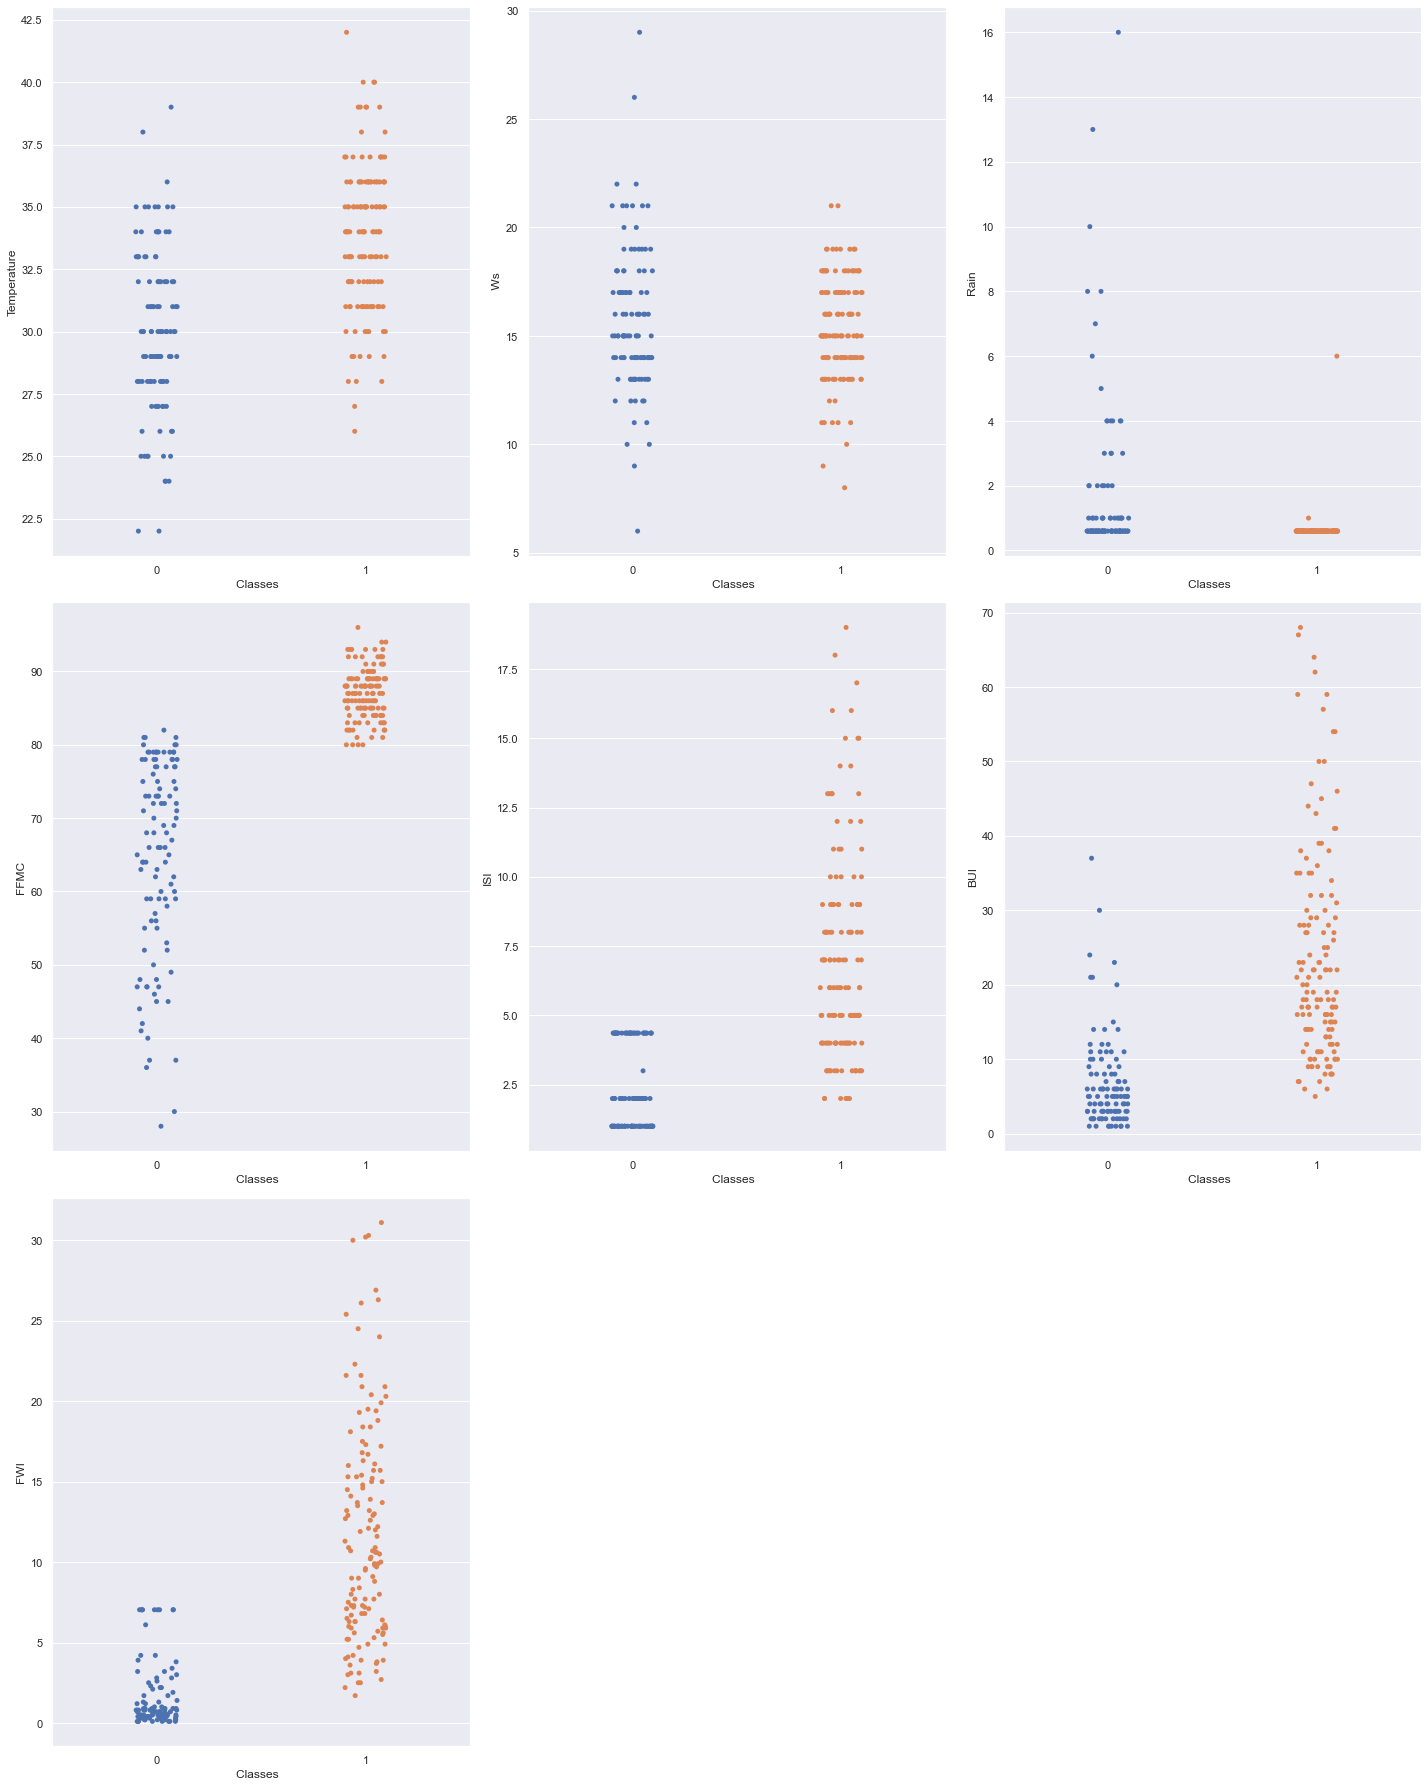

In [69]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [70]:
X_scaled = scaler.fit_transform(X)

In [71]:
X_scaled

array([[-0.87473544,  0.88999047, -0.27977182, ..., -1.06019717,
        -0.92994785, -0.93336546],
       [-0.87473544, -0.89291326, -0.05180536, ..., -1.06019717,
        -0.92994785, -0.94709958],
       [-1.70200461,  2.31631345,  6.75927425, ..., -0.166365  ,
        -1.00041595, -0.98830194],
       ...,
       [-1.42624822,  4.81237868, -0.27977182, ..., -0.166365  ,
        -0.92994785, -0.97456782],
       [-2.25351739,  0.88999047, -0.27977182, ..., -1.06019717,
        -0.78901166, -0.90589722],
       [-2.25351739, -0.17975177, -0.27977182, ..., -1.06019717,
        -0.85947975, -0.93336546]])

In [72]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,2.098566,Temperature
1,1.165076,Ws
2,1.318284,Rain
3,2.632792,FFMC
4,7.037841,ISI
5,5.869006,BUI
6,16.068147,FWI


All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
Before that, let's split our data in test and training set.

In [73]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [74]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

**PICKLE**

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [75]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [76]:
y_pred = log_reg.predict(x_test)

In [77]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9672131147540983

**Confusion matrix**- It is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

In [78]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[27,  0],
       [ 2, 32]], dtype=int64)

In [79]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

**Accuracy**- It is the measure of correctness of the value in correlation with the information.

In [80]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9672131147540983

**Precision**- It is the amount of information that is conveyed by a value.

In [81]:
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

**Recall** - It measures the proportion of actual positive labels correctly identified by the model.

In [82]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9310344827586207

**Fbeta-measure** - It is a generalization of the F-measure that adds a configuration parameter called beta. A default beta value is 1.0, which is the same as the F-measure. A smaller beta value, such as 0.5, gives more weight to precision and less to recall, whereas a larger beta value, such as 2.0, gives less weight to precision and more weight to recall in the calculation of the score.

In [83]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9642857142857143